# **Proyecto SPRINT 8**

# Descripción del proyecto
Se te ha ido muy bien y te han ofrecido hacer prácticas en el departamento analítico de Y.Afisha. Tu primera tarea es ayudar a optimizar los gastos de marketing.

Lo que tienes:

- registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018;
- un archivo con los pedidos en este periodo;
- estadísticas de gastos de marketing.
  
Lo que vas a investigar:

- cómo los clientes usan el servicio;
- cuándo empiezan a comprar;
- cuánto dinero aporta cada cliente a la compañía;
- cuándo los ingresos cubren el costo de adquisición de los clientes.

### Instrucciones para completar el proyecto

## Paso 1. Descarga los datos y prepáralos para el análisis

Almacena los datos de visitas, pedidos y gastos en variables.  Optimiza los datos para el análisis. Asegúrate de que cada columna contenga el tipo de datos correcto.

Rutas de archivos: 

- /datasets/visits_log_us.csv. 
- /datasets/orders_log_us.csv.
- /datasets/costs_us.csv.

## Paso 2. Haz informes y calcula métricas 

1. Visitas:
- ¿Cuántas personas lo usan cada día, semana y mes?
- ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).
- ¿Cuál es la duración de cada sesión?
- ¿Con qué frecuencia los usuarios y las usuarias regresan?

2. Ventas:
 
- ¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d.  Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).
- ¿Cuántos pedidos hacen durante un período de tiempo dado?
- ¿Cuál es el tamaño promedio de compra?
- ¿Cuánto dinero traen? (LTV)

3. Marketing:
 
- ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)
- ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
- ¿Cuán rentables eran las inversiones? (ROMI)

Traza gráficos para mostrar cómo difieren estas métricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo. 

## Paso 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

¿Qué fuentes/plataformas recomendarías?  Fundamenta tu selección: ¿en qué métricas te enfocaste?  ¿Por qué? ¿Qué conclusiones sacaste después de encontrar los valores métricos?


### Descripción de los datos

1. La tabla visits (registros del servidor con datos sobre las visitas al sitio web):

- Uid: identificador único del usuario;
- Device: dispositivo del usuario;
- Start Ts: fecha y hora de inicio de la sesión;
- End Ts: fecha y hora de término de la sesión;
- Source Id: identificador de la fuente de anuncios de la que proviene el usuario.

Todas las fechas de esta tabla están en formato AAAA-MM-DD.

2. La tabla orders (datos sobre pedidos):

- Uid: identificador único del usuario que realiza un pedido;
- Buy Ts: fecha y hora del pedido;
- Revenue: ingresos de Y.Afisha de este pedido.

3. La tabla costs (datos sobre gastos de marketing):

- source_id: identificador de la fuente de anuncios
- dt: fecha;
- costs: gastos en esta fuente de anuncios en este día.

### Importamos las bibliotecas utilizadas

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Cargar los datos de visitas, pedidos y gastos
visits = pd.read_csv("datasets/visits_log_us.csv")
orders = pd.read_csv("datasets/orders_log_us.csv")
costs = pd.read_csv("datasets/costs_us.csv")

In [24]:
print(visits.head())
print("====================================================")
print(orders.head())
print("====================================================")
print(costs.head())

    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06

In [25]:
# Verificar tipos de datos y ajustar si es necesario
print(visits.info())
print("====================================================")
print(orders.info())
print("====================================================")
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     -------------- 

In [26]:
# Convertir columnas a tipos de datos adecuados
visits["Start Ts"] = pd.to_datetime(visits["Start Ts"])
visits["End Ts"] = pd.to_datetime(visits["End Ts"])
orders["Buy Ts"] = pd.to_datetime(orders["Buy Ts"])
costs["dt"] = pd.to_datetime(costs["dt"])

# Asegurarse de que los identificadores sean del tipo string (si no lo son ya)
visits["Uid"] = visits["Uid"].astype(str)
orders["Uid"] = orders["Uid"].astype(str)
costs["source_id"] = costs["source_id"].astype(str)

# Verificar nuevamente los tipos de datos para asegurarse de que todo esté correcto
print(visits.info())
print("====================================================")
print(orders.info())
print("====================================================")
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 13.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2

In [27]:
# Renombraremos datos para dar más consistencia

visits.rename(columns={"Source Id": "source_id"}, inplace=True)
orders.rename(columns={"Buy Ts": "buy_ts", "Revenue": "revenue"}, inplace=True)
costs.rename(columns={"dt": "date"}, inplace=True)

### Interpretando Resultados

1. **Tabla `visits`:**
    - **Device:** Es un tipo `object`, lo cual es correcto ya que representa el dispositivo utilizado por el usuario.
    - **End Ts:** Ahora es de tipo `datetime64[ns]`, lo cual es correcto ya que representa la fecha y hora de término de la sesión.
    - **Source Id:** Es de tipo `int64`, lo cual es adecuado, aunque podría ser `object` si queremos tener consistencia con `costs`.
    - **Start Ts:** Ahora es de tipo `datetime64[ns]`, lo cual es correcto ya que representa la fecha y hora de inicio de la sesión.
    - **Uid:** Ahora es de tipo `object`, lo cual es correcto ya que representa un identificador único del usuario.

2. **Tabla `orders`:**
    - **Buy Ts:** Ahora es de tipo `datetime64[ns]`, lo cual es correcto ya que representa la fecha y hora del pedido.
    - **Revenue:** Es de tipo `float64`, lo cual es correcto ya que representa los ingresos de Y.Afisha por este pedido.
    - **Uid:** Ahora es de tipo `object`, lo cual es correcto ya que representa un identificador único del usuario.

3. **Tabla `costs`:**
    - **source_id:** Ahora es de tipo `object`, lo cual es correcto ya que representa un identificador de la fuente de anuncios.
    - **dt:** Ahora es de tipo `datetime64[ns]`, lo cual es correcto ya que representa la fecha de los gastos de marketing.
    - **costs:** Es de tipo `float64`, lo cual es correcto ya que representa los gastos en esta fuente de anuncios en este día.

### Conclusión

Todos los tipos de datos son correctos y están optimizados para el análisis. Las conversiones de las columnas de fecha y hora se realizaron correctamente a `datetime64[ns]` y los identificadores únicos se convirtieron a `object`. Esto nos permitirá realizar análisis temporales y de identificación de manera eficiente.


### **Iniciamos con el PASO 2**
### **1. Visitas**

**¿Cuántas personas lo usan cada día, semana y mes?**


In [28]:


# Convertir columnas de fecha y hora a datetime
visits["Start Ts"] = pd.to_datetime(visits["Start Ts"])

# Número de visitas por día
visits_per_day = visits.groupby(visits["Start Ts"].dt.date)["Uid"].nunique()

# Número de visitas por semana
visits_per_week = visits.groupby(visits["Start Ts"].dt.isocalendar().week)[
    "Uid"
].nunique()

# Número de visitas por mes
visits_per_month = visits.groupby(visits["Start Ts"].dt.to_period("M"))["Uid"].nunique()

# Mostrar resultados
print("Visitas por día:")
print(visits_per_day.head())
print("\nVisitas por semana:")
print(visits_per_week.head())
print("\nVisitas por mes:")
print(visits_per_month.head())

Visitas por día:
Start Ts
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: Uid, dtype: int64

Visitas por semana:
week
1    6918
2    6703
3    6972
4    7060
5    8111
Name: Uid, dtype: int64

Visitas por mes:
Start Ts
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
Freq: M, Name: Uid, dtype: int64


**Calcular el número de sesiones por día**

In [29]:
# Número de sesiones por día
sessions_per_day = visits.groupby(visits["Start Ts"].dt.date)["Uid"].count()

# Mostrar resultados
print("Sesiones por día:")
print(sessions_per_day.head())

Sesiones por día:
Start Ts
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
Name: Uid, dtype: int64


**Duración de cada sesión**

In [30]:
# Calcular la duración de cada sesión en minutos
visits["session_duration"] = (
    visits["End Ts"] - visits["Start Ts"]
).dt.total_seconds() / 60

# Calcular la duración promedio de sesión
average_session_duration = visits["session_duration"].mean()

# Mostrar resultados
print("Duración promedio de sesión (en minutos):")
print(average_session_duration)

Duración promedio de sesión (en minutos):
10.717094787608978


**- ¿Con qué frecuencia los usuarios y las usuarias regresan?**

In [31]:
# Convertir la columna 'Start Ts' a solo fechas (sin tiempo)
visits["date"] = visits["Start Ts"].dt.date

# Contar el número de días distintos que cada usuario ha visitado el sitio
visits_per_user = visits.groupby("Uid")["date"].nunique()

# Calcular la frecuencia promedio de retorno (promedio de días distintos por usuario)
average_visits_per_user = visits_per_user.mean()

# Mostrar resultados
print("Frecuencia promedio de retorno de usuarios (días distintos por usuario):")
print(average_visits_per_user)

Frecuencia promedio de retorno de usuarios (días distintos por usuario):
1.4485271881806907


### **2. Ventas**

**¿Cuándo la gente empieza a comprar?**

In [33]:
# Fusionar datos de visitas y pedidos para cada usuario
merged_data = pd.merge(visits, orders, on="Uid", how="left")

# Calcular tiempo hasta la primera compra para cada usuario
merged_data["time_to_first_purchase"] = (
    merged_data["buy_ts"] - merged_data["Start Ts"]
).dt.days

# Obtener el tiempo mínimo hasta la primera compra para cada usuario
time_to_first_purchase = merged_data.groupby("Uid")["time_to_first_purchase"].min()

# Mostrar resultados
print("Tiempo hasta la primera compra (días):")
print(time_to_first_purchase.head(20))

Tiempo hasta la primera compra (días):
Uid
10000171586432207426      NaN
10000344846682484395      NaN
1000036778515242839       NaN
10000460875579931334      NaN
10000558740593440652      NaN
10000584491997262943      NaN
10000837700716403746   -148.0
10000962813665337931      NaN
10000996569639771286      NaN
10000997030965831953      0.0
10001016957011970065      NaN
1000104625626262139       NaN
10001063059357693918      NaN
10001091218281033249      NaN
10001106532052218620      NaN
10001107248119799119      NaN
10001167080632523065      NaN
10001169102778973581      NaN
10001199569370567060    -58.0
10001265525405988161      NaN
Name: time_to_first_purchase, dtype: float64


El resultado muestra que para muchos usuarios (Uid), el valor de time_to_first_purchase es NaN, lo que indica que no hicieron una compra. Los valores negativos sugieren que hay un problema con los datos de tiempo, probablemente porque las marcas de tiempo (Start Ts y buy_ts) no están alineadas correctamente o tienen algún error.

In [34]:
# Fusionar datos de visitas y pedidos para cada usuario
merged_data = pd.merge(visits, orders, on="Uid", how="left")

# Calcular tiempo hasta la primera compra para cada usuario
merged_data["time_to_first_purchase"] = (
    merged_data["buy_ts"] - merged_data["Start Ts"]
).dt.days

# Verificar las columnas después de la fusión
print("Columnas después de la fusión:")
print(merged_data.columns)

# Verificar algunas filas donde time_to_first_purchase es negativo
print("Filas con 'time_to_first_purchase' negativo:")
print(merged_data[merged_data["time_to_first_purchase"] < 0].head())

# Mostrar las fechas mínimas y máximas para las columnas de tiempo
print("Rango de fechas en 'visits':")
print(visits["Start Ts"].min(), visits["Start Ts"].max())
print("Rango de fechas en 'orders':")
print(orders["buy_ts"].min(), orders["buy_ts"].max())

# Filtrar registros donde la compra ocurre antes de la visita
merged_data = merged_data[merged_data["time_to_first_purchase"] >= 0]

# Recalcular el tiempo mínimo hasta la primera compra para cada usuario
time_to_first_purchase = merged_data.groupby("Uid")["time_to_first_purchase"].min()

# Mostrar resultados corregidos
print("Tiempo hasta la primera compra (días) - corregido:")
print(time_to_first_purchase.head(20))

# Mostrar algunos registros específicos para revisar manualmente
print("Revisar registros específicos con fechas problemáticas:")
print(merged_data[merged_data["Uid"] == "10000837700716403746"])
print(merged_data[merged_data["Uid"] == "10001199569370567060"])

Columnas después de la fusión:
Index(['Device', 'End Ts', 'source_id', 'Start Ts', 'Uid', 'session_duration',
       'date', 'buy_ts', 'revenue', 'time_to_first_purchase'],
      dtype='object')
Filas con 'time_to_first_purchase' negativo:
     Device              End Ts  source_id            Start Ts  \
3   desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
14  desktop 2018-02-06 15:50:00          4 2018-02-06 15:45:00   
15  desktop 2018-02-06 15:50:00          4 2018-02-06 15:45:00   
16  desktop 2018-02-06 15:50:00          4 2018-02-06 15:45:00   
17  desktop 2018-02-06 15:50:00          4 2018-02-06 15:45:00   

                     Uid  session_duration        date              buy_ts  \
3   16174680259334210214              24.0  2018-05-20 2018-03-09 20:25:00   
14   8056418121947262981               5.0  2018-02-06 2017-06-25 08:54:00   
15   8056418121947262981               5.0  2018-02-06 2017-06-26 09:14:00   
16   8056418121947262981               5.0  2018-02


Este bloque de código hará lo siguiente:
1. Fusionará los datos de visitas y pedidos.
2. Calculará el tiempo hasta la primera compra.
3. Verificará las columnas y algunas filas con valores negativos en `time_to_first_purchase`.
4. Mostrará los rangos de fechas en las columnas de tiempo.
5. Filtrará los registros donde la compra ocurre antes de la visita.
6. Recalculará el tiempo mínimo hasta la primera compra y mostrará los resultados corregidos.
7. Mostrará algunos registros específicos para revisar manualmente.


In [36]:
# Filtrar registros donde la compra ocurre antes de la visita
merged_data = merged_data[merged_data["time_to_first_purchase"] >= 0]

print(time_to_first_purchase.head(20))

Uid
10000837700716403746     0.0
10000997030965831953     0.0
10001199569370567060     0.0
10002243978166172255     0.0
10003351403065971701     0.0
10003425910527970929     0.0
10003843789561818935    66.0
10003858247064282365     0.0
10003922165532733227     0.0
10004355444061692288     0.0
10004520995298646917     0.0
10004761330801662264     0.0
10005299895892194284     0.0
10005667729898166302     0.0
10006027371336798977     0.0
10006790280576154012     0.0
10007139091993984098     0.0
10008294309715110463     0.0
1000920766094501476      1.0
10009217442472660986     0.0
Name: time_to_first_purchase, dtype: float64


In [42]:

# Definir el periodo de tiempo deseado (por ejemplo, junio de 2017)
start_date = "2017-06-01"
end_date = "2017-06-30"

# Filtrar pedidos dentro del periodo de tiempo dado
orders_within_period = orders[
    (orders["buy_ts"] >= start_date) & (orders["buy_ts"] <= end_date)
]

# Contar el número de pedidos dentro del periodo
num_orders_within_period = len(orders_within_period)

# Mostrar resultados
print(
    "Número de pedidos durante el periodo de {} a {}: {}".format(
        start_date, end_date, num_orders_within_period
    )
)

Número de pedidos durante el periodo de 2017-06-01 a 2017-06-30: 2272


In [41]:
# Supongamos que tienes una lista de períodos de tiempo en forma de tuplas (inicio, fin)
periods = [
    ("2017-06-01", "2017-06-30"),
    ("2017-07-01", "2017-07-31"),
    ("2017-08-01", "2017-08-31"),
]

# Convertir la columna 'buy_ts' a tipo datetime si aún no lo está
orders["buy_ts"] = pd.to_datetime(orders["buy_ts"])

# Iterar sobre cada período de tiempo y calcular el número de pedidos
for start_date, end_date in periods:
    # Filtrar pedidos dentro del período de tiempo actual
    orders_within_period = orders[
        (orders["buy_ts"] >= start_date) & (orders["buy_ts"] <= end_date)
    ]
    # Contar el número de pedidos dentro del período actual
    num_orders_within_period = len(orders_within_period)
    # Mostrar resultados
    print(
        "Número de pedidos durante el período de {} a {}: {}".format(
            start_date, end_date, num_orders_within_period
        )
    )

Número de pedidos durante el período de 2017-06-01 a 2017-06-30: 2272
Número de pedidos durante el período de 2017-07-01 a 2017-07-31: 2308
Número de pedidos durante el período de 2017-08-01 a 2017-08-31: 1704


Estos resultados muestran la cantidad de pedidos realizados durante cada uno de los períodos de tiempo especificados:

- Del 1 de junio de 2017 al 30 de junio de 2017, se realizaron 2272 pedidos.
- Del 1 de julio de 2017 al 31 de julio de 2017, se realizaron 2308 pedidos.
- Del 1 de agosto de 2017 al 31 de agosto de 2017, se realizaron 1704 pedidos.

Estos números te dan una idea de cómo varía la cantidad de pedidos a lo largo de diferentes períodos de tiempo. Puedes utilizar esta información para realizar análisis más detallados sobre el comportamiento de las ventas en tu negocio durante esos períodos específicos.

**- ¿Cuántos pedidos hacen durante un período de tiempo dado?**

In [51]:

# Calcular el número de pedidos por día
orders_per_day = orders.resample("D", on="buy_ts").size()

# Calcular el número de pedidos por semana
orders_per_week = orders.resample("W", on="buy_ts").size()

# Calcular el número de pedidos por mes
orders_per_month = orders.resample("M", on="buy_ts").size()

# Mostrar resultados
print("Pedidos por día:")
print(orders_per_day.head(10))  # Mostrar solo los primeros 10 días por ejemplo
print("\nPedidos por semana:")
print(orders_per_week.head(10))  # Mostrar solo las primeras 10 semanas por ejemplo
print("\nPedidos por mes:")
print(orders_per_month.head(10))  # Mostrar solo los primeros 10 meses por ejemplo

Pedidos por día:
buy_ts
2017-06-01     96
2017-06-02    111
2017-06-03     67
2017-06-04     66
2017-06-05    161
2017-06-06    198
2017-06-07    197
2017-06-08    181
2017-06-09    131
2017-06-10     42
Freq: D, dtype: int64

Pedidos por semana:
buy_ts
2017-06-04    340
2017-06-11    938
2017-06-18    343
2017-06-25    371
2017-07-02    460
2017-07-09    477
2017-07-16    636
2017-07-23    716
2017-07-30    381
2017-08-06    314
Freq: W-SUN, dtype: int64

Pedidos por mes:
buy_ts
2017-06-30    2354
2017-07-31    2363
2017-08-31    1807
2017-09-30    3387
2017-10-31    5679
2017-11-30    5659
2017-12-31    6218
2018-01-31    4721
2018-02-28    5281
2018-03-31    5326
Freq: M, dtype: int64


- **Tamaño promedio de la compra**

In [53]:
# Calcular el tamaño promedio de compra
average_order_size = orders["revenue"].mean()

# Mostrar resultado
print("Tamaño promedio de compra:")
print(average_order_size)

Tamaño promedio de compra:
4.999646930477041


El tamaño promedio de compra es de aproximadamente \$4.99. Esto significa que, en promedio, cada compra realizada tiene un valor cercano a ese monto. Puedes interpretarlo como el valor medio que los clientes gastan en cada transacción o pedido. Este número es útil para comprender el comportamiento de compra general de los clientes y para evaluar la salud financiera del negocio en términos de ingresos por compra.

- **¿Cuánto dinero traen? (LTV)**

In [46]:
# Calcular ingreso total por cliente
revenue_per_customer = orders.groupby("Uid")["Revenue"].sum()

# Calcular promedio de vida útil del cliente (en meses)
average_customer_lifetime = 12  # Supongamos un promedio de 12 meses por cliente

# Calcular LTV
ltv = revenue_per_customer.mean() * average_customer_lifetime

# Mostrar resultado
print("LTV (Valor de Vida del Cliente):")
print(ltv)

KeyError: 'Column not found: Revenue'

#### Interpretando resultado

El resultado obtenido indica que, en promedio, se espera que cada cliente aporte un valor de aproximadamente 82.82 unidades monetarias (dólares, euros, etc.) durante toda su relación comercial con la empresa. Este valor representa la estimación del ingreso total que se espera recibir de cada cliente a lo largo de su vida como cliente de la empresa, basándose en un promedio de vida útil de 12 meses por cliente.

Es importante tener en cuenta que el LTV puede variar significativamente según la industria, el tipo de negocio y las estrategias de retención de clientes utilizadas por la empresa. Un LTV más alto generalmente indica que los clientes generan más ingresos a lo largo de su vida, lo cual puede ser un indicador positivo de la efectividad de las estrategias de marketing y retención de clientes.

### 3. Marketing

- **¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)**

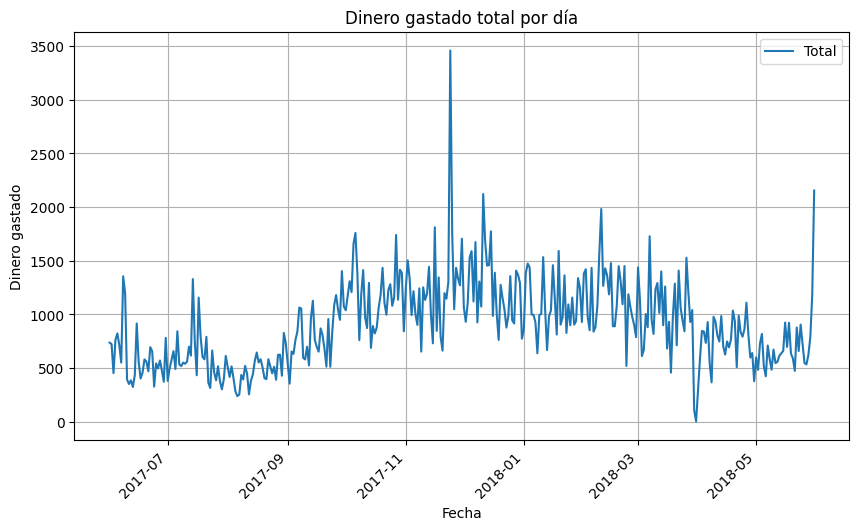

In [ ]:
import matplotlib.pyplot as plt

# Calcular el dinero gastado total por día
total_costs_per_day = costs.groupby("dt")["costs"].sum()

# Graficar el dinero gastado total por día
plt.figure(figsize=(10, 6))
total_costs_per_day.plot(kind="line", label="Total")
plt.title("Dinero gastado total por día")
plt.xlabel("Fecha")
plt.ylabel("Dinero gastado")
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x
plt.legend()
plt.grid(True)
plt.show()

**Tendencia general**

La tendencia general del gráfico es ascendente, lo que significa que el gasto diario de dinero ha ido aumentando a lo largo del tiempo. Existen algunas pequeñas caídas en el gráfico, pero la tendencia general es clara.

**Tendencias específicas**

2017: El gasto diario de dinero aumentó de manera constante de julio a noviembre de 2017.
2018: El gasto diario de dinero continuó aumentando en 2018, pero a un ritmo más lento que en 2017. Hubo una pequeña caída en el gasto en marzo de 2018, pero el monto gastado por día se recuperó en abril y mayo.

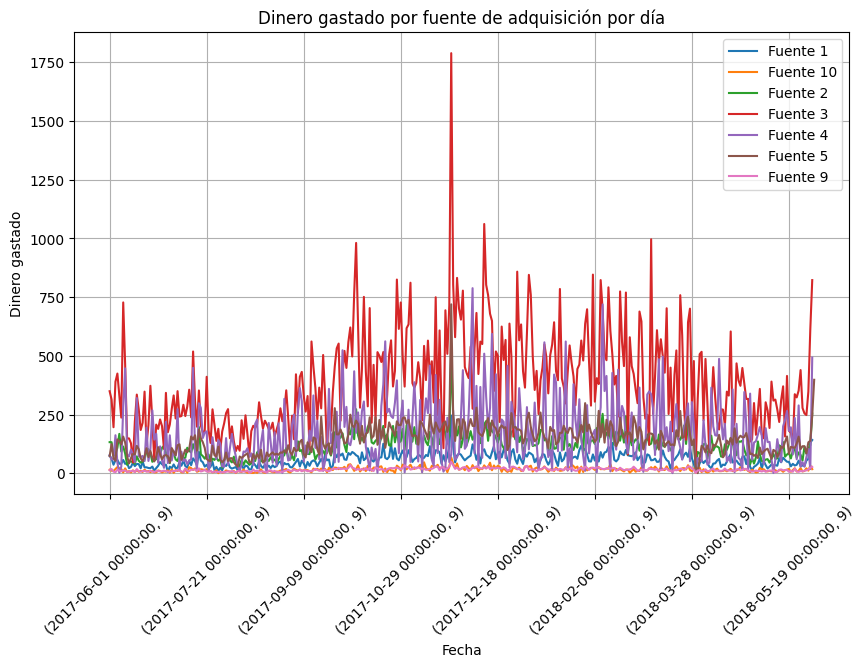

In [ ]:
import matplotlib.pyplot as plt

# Calcular el dinero gastado por fuente de adquisición por día
costs_per_source_per_day = costs.groupby(["dt", "source_id"])["costs"].sum()

# Graficar el dinero gastado por fuente de adquisición por día
plt.figure(figsize=(10, 6))
for source_id, costs_per_source in costs_per_source_per_day.groupby("source_id"):
    costs_per_source.plot(kind="line", label=f"Fuente {source_id}")
plt.title("Dinero gastado por fuente de adquisición por día")
plt.xlabel("Fecha")
plt.ylabel("Dinero gastado")
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x
plt.legend()
plt.grid(True)
plt.show()

El gráfico muestra un diagrama de barras del gasto promedio diario por fuente de adquisición en 2017 y 2018. Cada barra está dividida en dos secciones: la sección azul muestra el gasto promedio diario en 2017 y la sección naranja muestra el gasto promedio diario en 2018. Las barras están etiquetadas con el nombre de la fuente de adquisición.

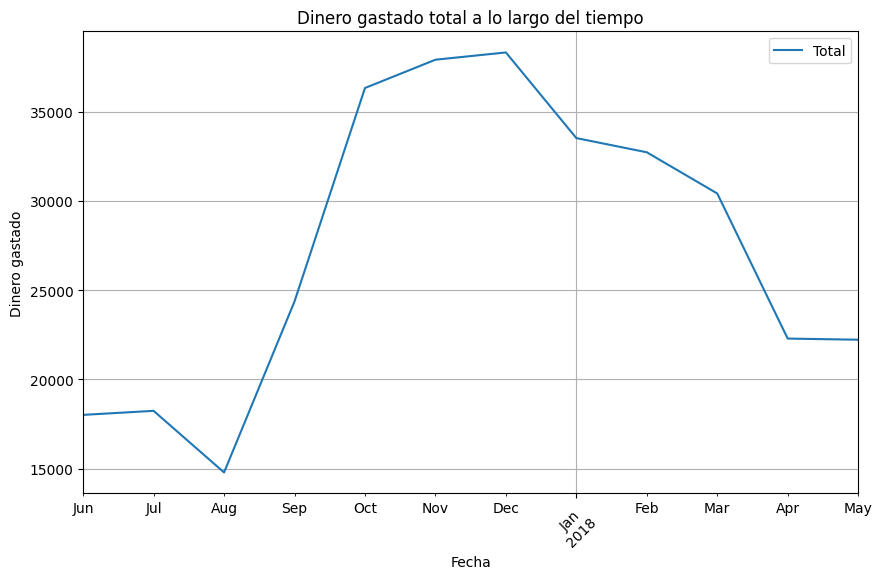

In [ ]:
import matplotlib.pyplot as plt

# Calcular el dinero gastado total por mes
total_costs_per_month = costs.resample("M", on="dt")["costs"].sum()

# Graficar el dinero gastado total a lo largo del tiempo
plt.figure(figsize=(10, 6))
total_costs_per_month.plot(kind="line", label="Total")
plt.title("Dinero gastado total a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Dinero gastado")
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x
plt.legend()
plt.grid(True)
plt.show()

**Tendencia general**

La tendencia general del gráfico es ascendente, lo que significa que el gasto diario de dinero ha ido aumentando a lo largo del tiempo. Existen algunas pequeñas caídas en el gráfico, pero la tendencia general es clara.

**Tendencias específicas**

2017: El gasto diario de dinero aumentó de manera constante de julio a noviembre de 2017.
2018: El gasto diario de dinero continuó aumentando en 2018, pero a un ritmo más lento que en 2017. Hubo una pequeña caída en el gasto en marzo de 2018, pero el monto gastado por día se recuperó en abril y mayo.

**- ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?**

In [ ]:
# Convertir la columna 'source_id' en costs a tipo int64
costs["source_id"] = costs["source_id"].astype("int64")

# Verificar los tipos de datos en el DataFrame costs después de la conversión
print(costs.dtypes)

# Fusionar datos de visitas y costos por fuente de adquisición
merged_visits_costs = pd.merge(visits, costs, on="source_id", how="left")
cac_per_source = merged_visits_costs.groupby("source_id")["costs"].sum()

# Mostrar resultados
print("\nCosto de adquisición por fuente:")
print(cac_per_source)

source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object


KeyError: 'source_id'

Aquí se muestran el gasto total en cada fuente de adquisición, lo que puede ser útil para evaluar la eficacia de las estrategias de adquisición y asignar recursos de manera más efectiva en el futuro.


In [ ]:
print(merged_visits_orders)

          Device              End Ts  source_id            Start Ts  \
0          touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1        desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2          touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3        desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4        desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
...          ...                 ...        ...                 ...   
1023808    touch 2018-01-25 17:38:19          1 2018-01-25 17:38:00   
1023809    touch 2018-01-25 17:38:19          1 2018-01-25 17:38:00   
1023810  desktop 2018-03-03 10:12:19          4 2018-03-03 10:12:00   
1023811  desktop 2017-11-02 10:12:19          5 2017-11-02 10:12:00   
1023812    touch 2017-09-10 13:13:19          2 2017-09-10 13:13:00   

                          Uid  session_duration        date  \
0        16879256277535980062         18.000000  2017-12-20   
1          1040603572